<img src="Analysis.jpg" width=1000 height=600  align="center">

### 1.  PySpark environment setup

In [9]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

In [10]:
import findspark
findspark.init()

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [11]:
import sys
sys.version

'3.7.3 (default, Jul 25 2020, 13:03:44) \n[GCC 8.3.0]'

### 2. Load packages

In [12]:
import pyspark
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import *
#from pyspark.sql.functions import when, count, col, countDistinct, desc, first, lit, min, max, UserDefinedFunction, sum, avg, UserDefinedFunction

### 3. Import data

In [50]:
df = spark.read \
                 .option("inferSchema", "true") \
                 .option("header", "true") \
                 .csv("Suicides in India 2001-2012.csv")

df.cache()

DataFrame[State: string, Year: int, Type_code: string, Type: string, Gender: string, Age_group: string, Total: int]

### 4. Data Description

The dataset chosen here is provided by the **National Crime Records Bureau (NCRB)** of India.  

The details on the data set are:
* Time period ranges from 2001 to 2012
* It is yearly data 
* The location is India

The columns include:
* State
* Year
* Type_code (Mainly shows the causes and background info, such as education status, professional profile, how suicide was comitted, social status and the cause for comittng suicide)
* Type (Further specifies the type_code)
* Gender
* Age_group
* Total (Total number of suicides comitted)




### 5. EDA 

General overview of the data:

In [51]:
df.show(10) 

+-------------+----+---------+--------------------+------+---------+-----+
|        State|Year|Type_code|                Type|Gender|Age_group|Total|
+-------------+----+---------+--------------------+------+---------+-----+
|A & N Islands|2001|   Causes|  Illness (Aids/STD)|Female|     0-14|    0|
|A & N Islands|2001|   Causes|Bankruptcy or Sud...|Female|     0-14|    0|
|A & N Islands|2001|   Causes|Cancellation/Non-...|Female|     0-14|    0|
|A & N Islands|2001|   Causes|Physical Abuse (R...|Female|     0-14|    0|
|A & N Islands|2001|   Causes|       Dowry Dispute|Female|     0-14|    0|
|A & N Islands|2001|   Causes|     Family Problems|Female|     0-14|    0|
|A & N Islands|2001|   Causes|Ideological Cause...|Female|     0-14|    0|
|A & N Islands|2001|   Causes|Other Prolonged I...|Female|     0-14|    0|
|A & N Islands|2001|   Causes|    Property Dispute|Female|     0-14|    0|
|A & N Islands|2001|   Causes|Fall in Social Re...|Female|     0-14|    0|
+-------------+----+-----

The total number of records:

In [52]:
print('Total Records in dataset', df.count())

Total Records in dataset 237519


The schema of the data set:

In [53]:
df.printSchema()
display(Markdown("This DataFrame has **%d rows**." % df.count()))

root
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Type_code: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age_group: string (nullable = true)
 |-- Total: integer (nullable = true)



This DataFrame has **237519 rows**.

Wich columns do we have?

In [57]:
df.columns

['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total']

Check how many missing values we have in each column:

In [58]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in ["State", "Year", "Type_code", "Type", "Gender", "Age_group", "Total"]]).show()

+-----+----+---------+----+------+---------+-----+
|State|Year|Type_code|Type|Gender|Age_group|Total|
+-----+----+---------+----+------+---------+-----+
|    0|   0|        0|   0|     0|        0|    0|
+-----+----+---------+----+------+---------+-----+



In [59]:
df.select([count(when(col(c) == "NA", c)).alias(c) for c in ["State", "Year", "Type_code", "Type", "Gender", "Age_group", "Total"]]).show()

+-----+----+---------+----+------+---------+-----+
|State|Year|Type_code|Type|Gender|Age_group|Total|
+-----+----+---------+----+------+---------+-----+
|    0|   0|        0|   0|     0|        0|    0|
+-----+----+---------+----+------+---------+-----+



The quality of the data is very high since we do not have any missing values and the columns are also already in the right format.
So at this point, there is no need to conduct further data cleaning.

Check the number of distinct values:

In [60]:
df.select([countDistinct(c).alias(c) for c in ["State","Type_code","Type","Age_group"]]).show()

+-----+---------+----+---------+
|State|Type_code|Type|Age_group|
+-----+---------+----+---------+
|   38|        5|  69|        6|
+-----+---------+----+---------+



Show the different categories of type_code:

In [61]:
df.select("Type_code").distinct().collect()

[Row(Type_code='Education_Status'),
 Row(Type_code='Professional_Profile'),
 Row(Type_code='Means_adopted'),
 Row(Type_code='Social_Status'),
 Row(Type_code='Causes')]

Show the different states:

In [62]:
df.select("State").distinct().collect()

[Row(State='Nagaland'),
 Row(State='Karnataka'),
 Row(State='Odisha'),
 Row(State='Kerala'),
 Row(State='Tamil Nadu'),
 Row(State='Chhattisgarh'),
 Row(State='Andhra Pradesh'),
 Row(State='Lakshadweep'),
 Row(State='Madhya Pradesh'),
 Row(State='Punjab'),
 Row(State='Manipur'),
 Row(State='Daman & Diu'),
 Row(State='Jammu & Kashmir'),
 Row(State='Goa'),
 Row(State='Mizoram'),
 Row(State='Himachal Pradesh'),
 Row(State='Puducherry'),
 Row(State='Haryana'),
 Row(State='Total (All India)'),
 Row(State='Jharkhand'),
 Row(State='Arunachal Pradesh'),
 Row(State='Gujarat'),
 Row(State='Sikkim'),
 Row(State='Delhi (Ut)'),
 Row(State='Chandigarh'),
 Row(State='Rajasthan'),
 Row(State='Assam'),
 Row(State='Total (States)'),
 Row(State='Meghalaya'),
 Row(State='Maharashtra'),
 Row(State='West Bengal'),
 Row(State='Bihar'),
 Row(State='D & N Haveli'),
 Row(State='Total (Uts)'),
 Row(State='Tripura'),
 Row(State='Uttar Pradesh'),
 Row(State='Uttarakhand'),
 Row(State='A & N Islands')]

Drop "invalid" states

In [63]:
df = df.filter((df.State != "Total (Uts)") & (df.State != "Total (States)") & (df.State != "Total (All India)"))

Double check if it worked:

In [64]:
df.select("State").distinct().collect()

[Row(State='Nagaland'),
 Row(State='Karnataka'),
 Row(State='Odisha'),
 Row(State='Kerala'),
 Row(State='Tamil Nadu'),
 Row(State='Chhattisgarh'),
 Row(State='Andhra Pradesh'),
 Row(State='Lakshadweep'),
 Row(State='Madhya Pradesh'),
 Row(State='Punjab'),
 Row(State='Manipur'),
 Row(State='Daman & Diu'),
 Row(State='Jammu & Kashmir'),
 Row(State='Goa'),
 Row(State='Mizoram'),
 Row(State='Himachal Pradesh'),
 Row(State='Puducherry'),
 Row(State='Haryana'),
 Row(State='Jharkhand'),
 Row(State='Arunachal Pradesh'),
 Row(State='Gujarat'),
 Row(State='Sikkim'),
 Row(State='Delhi (Ut)'),
 Row(State='Chandigarh'),
 Row(State='Rajasthan'),
 Row(State='Assam'),
 Row(State='Meghalaya'),
 Row(State='Maharashtra'),
 Row(State='West Bengal'),
 Row(State='Bihar'),
 Row(State='D & N Haveli'),
 Row(State='Tripura'),
 Row(State='Uttar Pradesh'),
 Row(State='Uttarakhand'),
 Row(State='A & N Islands')]

Calculate the frequency of each of the causes for suicide:

In [66]:
frequency_causes_DF = df.where((col("Type_code")=="Causes")).groupBy("Type")\
                      .agg(sum("Total").alias("Total"))\
                      .orderBy(col("Total").desc())
frequency_causes_DF.show()

+--------------------+------+
|                Type| Total|
+--------------------+------+
|     Family Problems|341952|
|    Causes Not known|237069|
|Other Causes (Ple...|216050|
|Other Prolonged I...|194565|
|Insanity/Mental I...| 94229|
|        Love Affairs| 45039|
|Bankruptcy or Sud...| 32755|
|             Poverty| 32684|
|       Dowry Dispute| 31970|
|Drug Abuse/Addiction| 30046|
|        Unemployment| 27365|
|Failure in Examin...| 27005|
|    Property Dispute| 18652|
|Suspected/Illicit...| 14911|
|Fall in Social Re...| 13464|
|Professional/Care...| 12554|
|Cancellation/Non-...| 11296|
|Death of Dear Person| 10321|
|              Cancer|  9058|
|  Illness (Aids/STD)|  8723|
+--------------------+------+
only showing top 20 rows



Most frequent cause for suicide:

In [67]:
frequency_causes_DF.orderBy(col("Total").desc()).first()

Row(Type='Family Problems', Total=341952)

The most frequent cause for suicide is **Family problems** with a total of 341952.

Least freuqent cause for suicide:

In [68]:
frequency_causes_DF.orderBy(col("Total").asc()).first()

Row(Type='Not having Children (Barrenness/Impotency', Total=766)

The least frequent cause for suicide is **not having children** with a total of 766. 

Calculate the frequency of committed sucides **for the different professional profiles**:

In [69]:
frequency_professional_DF = df.where((col("Type_code")=="Professional_Profile")).groupBy("Type")\
                      .agg(sum("Total").alias("Total"))
frequency_professional_DF.show()

+--------------------+------+
|                Type| Total|
+--------------------+------+
|Farming/Agricultu...|197923|
|             Student| 74323|
|Others (Please Sp...|469147|
|Self-employed (Bu...| 78112|
|          House Wife|285243|
|      Retired Person| 11334|
|Service (Government)| 23325|
|Professional Acti...| 39204|
|Public Sector Und...| 30786|
|   Service (Private)|115472|
|          Unemployed|114374|
+--------------------+------+



Most frequent professional profile:

In [70]:
frequency_professional_DF.orderBy(col("Total").desc()).first()

Row(Type='Others (Please Specify)', Total=469147)

The most frequent professional profile is **Others** with a total of 469147.

Least frequent professional profile:

In [71]:
frequency_professional_DF.orderBy(col("Total").asc()).first()

Row(Type='Retired Person', Total=11334)

The least frequent professional profile is **Reitred Person** with 11334.

Calculate the frequency of committed sucides **for the education status categories**:

In [72]:
frequency_education_DF = df.where((col("Type_code")=="Education_Status")).groupBy("Type")\
                      .agg(sum("Total").alias("Total"))
frequency_education_DF.show()

+--------------------+------+
|                Type| Total|
+--------------------+------+
|        No Education|321757|
|              Middle|342971|
|Post Graduate and...|  7475|
|Hr. Secondary/Int...|118908|
|             Diploma| 14153|
|             Primary|362827|
|            Graduate| 31274|
|Matriculate/Secon...|256566|
+--------------------+------+



Most frequent education status:

In [73]:
frequency_education_DF.orderBy(col("Total").desc()).first()

Row(Type='Primary', Total=362827)

The most frequent education status is **Primary** with a total of 362827.

Least frequent education status:

In [74]:
frequency_education_DF.orderBy(col("Total").asc()).first()

Row(Type='Post Graduate and Above', Total=7475)

The least frequent education status is **Post Graduate** and Above with a total of 7475.

Frequency of **mode** on how suicide was committed

In [75]:
frequency_mode_DF = df.where((col("Type_code")=="Means_adopted")).groupBy("Type")\
                      .agg(sum("Total").alias("Total"))
frequency_mode_DF.show()

+--------------------+------+
|                Type| Total|
+--------------------+------+
|By touching elect...| 10816|
|By coming under r...| 45299|
|By Overdose of sl...|  9960|
|        By Fire-Arms|  6294|
|By Consuming Othe...|231178|
|By Jumping from (...|  7871|
|By Self Inflictio...|  5093|
|         By Drowning| 96711|
|  By Over Alcoholism| 15973|
|      By Other means|  9238|
|By Jumping off Mo...|  8116|
|By Jumping from (...|  8127|
|By Consuming Inse...|275501|
|          By Machine|  1661|
|By Other means (p...|135132|
|          By Hanging|460955|
|By Fire/Self Immo...|128006|
+--------------------+------+



Most frequent mode:

In [76]:
frequency_mode_DF.orderBy(col("Total").desc()).first()

Row(Type='By Hanging', Total=460955)

The most frequent mode is **By Hanging** with a total of 460955.

Least frequent mode:

In [30]:
frequency_mode_DF.orderBy(col("Total").asc()).first()

Row(Type='By Machine', Total=1661)

The least frequent mode is **By Machine** with a total of 1661.

Frequency of committed sucides for the different **social statuses**:

In [77]:
frequency_status_DF = df.where((col("Type_code")=="Social_Status")).groupBy("Type")\
                      .agg(sum("Total").alias("Total"))
frequency_status_DF.show()

+---------------+-------+
|           Type|  Total|
+---------------+-------+
|  Never Married| 318301|
|Widowed/Widower|  62113|
|        Married|1021774|
|      Seperated|  38471|
|       Divorcee|  15272|
+---------------+-------+



Most frequent social status:

In [78]:
frequency_status_DF.orderBy(col("Total").desc()).first()

Row(Type='Married', Total=1021774)

The most frequent social status is **Married** with a total of 1021774.

Least frequent social status:

In [79]:
frequency_status_DF.orderBy(col("Total").asc()).first()

Row(Type='Divorcee', Total=15272)

The least frequent social status is **Divorcee** with a total of 15272.

However, those values should be interpreted with caution as for example, the share of people who are 
married in India is higehr than those living divorced. 

### 6. Questions relevant in the context to better understand the causes and groups

##### 6.1 How did the yearly sum of suicides develop and how did they develop compared to other countries/worldwide?

Calculate the yearly sum of sucides:
(Disclaimer we need to decide on one category as otherwise we would double count cases)

In [102]:
yearly_sum = df.where((col("Type_code")=="Causes")).groupBy("Year").agg(sum("Total").alias("Sum")).orderBy("Year")
yearly_sum.show()

+----+------+
|Year|   Sum|
+----+------+
|2001|108506|
|2002|110417|
|2003|110851|
|2004|113697|
|2005|113914|
|2006|118112|
|2007|122637|
|2008|125017|
|2009|127151|
|2010|134599|
|2011|135585|
|2012|120488|
+----+------+



We see an **increase** of the sum of suicides in each year except for 2012.

Visualization of the development:

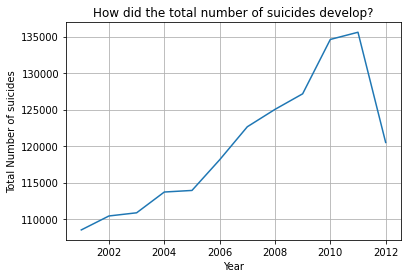

In [103]:
import matplotlib.pyplot as plt

y_ans_val = [val.Sum for val in yearly_sum.select('Sum').collect()]
x_ts = [val.Year for val in yearly_sum.select('Year').collect()]

plt.plot(x_ts, y_ans_val)
plt.ylabel('Total Number of suicides')
plt.yscale('linear')
plt.xlabel('Year')
plt.title('How did the total number of suicides develop?')
plt.grid(True)

plt.show()

It can be seen that up to 2011 the total number of suicides increased siginificantly and leaves the peak in 2012. 

Minimum, maximum & average suicide rate in a year:

In [104]:
from pyspark.sql.functions import round as sqlround

In [105]:
yearly_sum.agg(min("Sum").alias("min_suicide_rate"),\
               max("Sum").alias("max_suicide_rate"),\
               sqlround(avg("Sum")).alias("avg_suicide_rate"))\
            .show()

+----------------+----------------+----------------+
|min_suicide_rate|max_suicide_rate|avg_suicide_rate|
+----------------+----------------+----------------+
|          108506|          135585|        120081.0|
+----------------+----------------+----------------+



Since the data set using here we are only having data on suicide rates in India. I thought it might be interesting to also take into consideration another data set provided by WHO. This data set provides aggregate numbers covering a time frame from 1979 until 2016 for a variety of different countries. 

Read the data set:

In [106]:
df_WHO = spark.read \
                 .option("inferSchema", "true") \
                 .option("header", "true") \
                 .csv("who_suicide_statistics.csv")

In [107]:
df_WHO.printSchema()
display(Markdown("This DataFrame has **%d rows**." % df_WHO.count()))

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)



This DataFrame has **43776 rows**.

Which countries can we find in the WHO data set?

In [108]:
df_WHO.select("Country").distinct().show()

+--------------------+
|             Country|
+--------------------+
|            Anguilla|
|            Paraguay|
|          Cabo Verde|
|              Sweden|
|            Kiribati|
|   Republic of Korea|
|              Guyana|
|         Philippines|
|Occupied Palestin...|
|            Malaysia|
|           Singapore|
|                Fiji|
|              Turkey|
|      TFYR Macedonia|
|                Iraq|
|             Germany|
|              Jordan|
|            Maldives|
|              France|
|Turks and Caicos ...|
+--------------------+
only showing top 20 rows



For comparison, I will go for the Philippines and Spain:

Calculations for the Philippines:

In [111]:
yearly_sum_PH = df_WHO.where((col("Country")=="Philippines") & (col("Year")>="2001") & (col("Year")<="2012"))\
                .groupBy("Year")\
                .agg(sum("suicides_no").alias("Sum"))\
                .orderBy("Year")

Visualization for the Philippines:

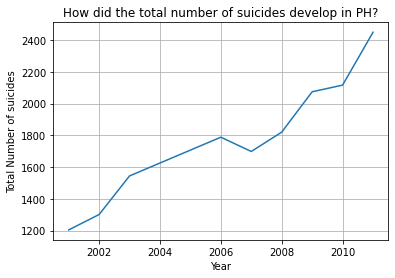

In [112]:
y_ans_val = [val.Sum for val in yearly_sum_PH.select('Sum').collect()]
x_ts = [val.Year for val in yearly_sum_PH.select('Year').collect()]

plt.plot(x_ts, y_ans_val)
plt.ylabel('Total Number of suicides')
plt.yscale('linear')
plt.xlabel('Year')
plt.title('How did the total number of suicides develop in PH?')
plt.grid(True)

plt.show()

Similar to what we have seen for India, there is a steady increase of number of suicides. The difference here is that the relative increase of suicides in the Philippines is definitely higher. As we can see in 2001 there were around 1200 suicides, while in 2011 the number doubled with around 2400.

Calculations for Spain:

In [113]:
yearly_sum_ES = df_WHO.where((col("Country")=="Spain") & (col("Year")>="2001") & (col("Year")<="2012"))\
                .groupBy("Year")\
                .agg(sum("suicides_no").alias("Sum"))\
                .orderBy("Year")

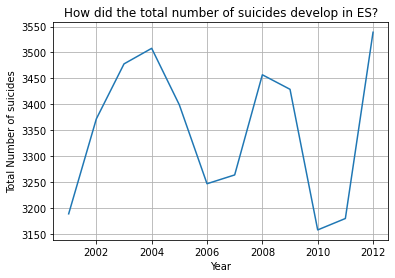

In [114]:
y_ans_val = [val.Sum for val in yearly_sum_ES.select('Sum').collect()]
x_ts = [val.Year for val in yearly_sum_ES.select('Year').collect()]

plt.plot(x_ts, y_ans_val)
plt.ylabel('Total Number of suicides')
plt.xlabel('Year')
plt.title('How did the total number of suicides develop in ES?')
plt.grid(True)

plt.show()

This graph shows the development of suicide cases in Spain. As can been seen the number of cases in the given time frame is realtively stable, not like we have seen for India and the Philippines.

And how does it look like if we look at the average worldwide?

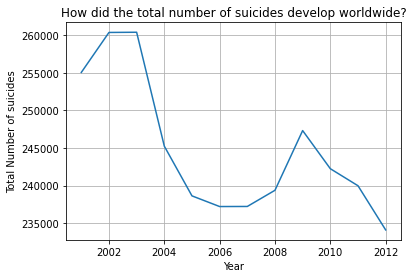

In [115]:
yearly_sum_ALL = df_WHO.where((col("Year")>="2001") & (col("Year")<="2012"))\
                .groupBy("Year")\
                .agg(sum("suicides_no").alias("Sum"))\
                .orderBy("Year")

y_ans_val = [val.Sum for val in yearly_sum_ALL.select('Sum').collect()]
x_ts = [val.Year for val in yearly_sum_ALL.select('Year').collect()]

plt.plot(x_ts, y_ans_val)
plt.ylabel('Total Number of suicides')
plt.yscale('linear')
plt.xlabel('Year')
plt.title('How did the total number of suicides develop worldwide?')
plt.grid(True)

plt.show()

Looking at the worldwide development of suicides, we can see that the overall trend is towards less suicides comitted.

#### 6.2 What was the yearly % change of suicide cases?

In [116]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

In [117]:
number_window = Window.partitionBy().orderBy("Year")

In [118]:
yearly_sum.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Sum: long (nullable = true)



In [119]:
yearly_sum = df.groupBy("Year").agg(sum("Total").alias("Sum")).orderBy("Year")

In [120]:
yearly_sum = yearly_sum.withColumn("Sum", yearly_sum["Sum"].cast(IntegerType()))

In [121]:
yearly_sum = yearly_sum.withColumn("Previous", F.lag(yearly_sum.Sum).over(number_window))
yearly_sum = yearly_sum.withColumn("diff", F.when(F.isnull(yearly_sum.Sum - yearly_sum.Previous), 0).otherwise(yearly_sum.Sum - yearly_sum.Previous))
yearly_sum.show()

+----+------+--------+------+
|Year|   Sum|Previous|  diff|
+----+------+--------+------+
|2001|542440|    null|     0|
|2002|551980|  542440|  9540|
|2003|554218|  551980|  2238|
|2004|568349|  554218| 14131|
|2005|569545|  568349|  1196|
|2006|590543|  569545| 20998|
|2007|613119|  590543| 22576|
|2008|625014|  613119| 11895|
|2009|635429|  625014| 10415|
|2010|672926|  635429| 37497|
|2011|677159|  672926|  4233|
|2012|647288|  677159|-29871|
+----+------+--------+------+



In [122]:
yearly_sum_agg = yearly_sum.withColumn("perc_change",  sqlround((F.col("diff") / F.col("Previous"))*100))
yearly_sum_agg.show()

+----+------+--------+------+-----------+
|Year|   Sum|Previous|  diff|perc_change|
+----+------+--------+------+-----------+
|2001|542440|    null|     0|       null|
|2002|551980|  542440|  9540|        2.0|
|2003|554218|  551980|  2238|        0.0|
|2004|568349|  554218| 14131|        3.0|
|2005|569545|  568349|  1196|        0.0|
|2006|590543|  569545| 20998|        4.0|
|2007|613119|  590543| 22576|        4.0|
|2008|625014|  613119| 11895|        2.0|
|2009|635429|  625014| 10415|        2.0|
|2010|672926|  635429| 37497|        6.0|
|2011|677159|  672926|  4233|        1.0|
|2012|647288|  677159|-29871|       -4.0|
+----+------+--------+------+-----------+



As we have already seen in the graph, we have a positive growth rate for each year excpet for 2012.

In [123]:
yearly_sum_agg.agg(min("perc_change").alias("min_perc_change"),\
               max("perc_change").alias("max_perc_change"),\
               sqlround(avg("perc_change")).alias("avg_perc_change"))\
               .show()

+---------------+---------------+---------------+
|min_perc_change|max_perc_change|avg_perc_change|
+---------------+---------------+---------------+
|           -4.0|            6.0|            2.0|
+---------------+---------------+---------------+



#### 6.3 Do the numbers of  suicides committed change among age groups and gender?

In [124]:
Gender_DF = df\
   .withColumn("Age_group", when(col("Age_group") == "0-14", "Child")\
                               .when((col("Age_group")) == "15-29" ," Young adult")\
                               .when((col("Age_group"))== "30-44" , "Medium aged adult")\
                               .when((col("Age_group"))== "45-59" , "Older aged adult")\
                               .when((col("Age_group"))== "60+", "Retired adult")\
                               .otherwise("Very old adult"))

In [125]:
Gender_DF.groupBy("Age_group")\
         .agg(sum("Total").alias("Sum"))\
         .orderBy(col("Sum").desc())\
         .show()

+-----------------+-------+
|        Age_group|    Sum|
+-----------------+-------+
|   Very old adult|2911862|
|      Young adult|1534037|
|Medium aged adult|1471599|
| Older aged adult| 885177|
|    Retired adult| 346925|
|            Child|  98410|
+-----------------+-------+



This table proves that there is definitely a difference between the age groups. The group which is most at risk for committing suicide are very old adults, while the number of childs comitting suicide is quite low with 98410 overall.

In [133]:
df.groupBy("Gender")\
         .agg(sum("Total").alias("Sum"))\
         .orderBy("Sum")\
         .show()

+------+-------+
|Gender|    Sum|
+------+-------+
|Female|2606922|
|  Male|4641088|
+------+-------+



The ratio between male and female persons committing suicides is 2:1, meaning that a male is twice as likely to commit suicide as a women. 

Nice to have but not mandatory, create a markdown:

In [128]:
print ("Frequency of female and male:")
Frequency_gender = df.groupBy("Gender")\
                     .agg(sum("Total").alias("Sum"))\
                     .orderBy("Sum")\
                     .show()

Freq_male = Frequency_gender.orderBy(col("Sum").asc()).first()
Freq_female = Frequency_gender.orderBy(col("Sum").desc()).first()

display(Markdown("""
| %s | %s | 
|----|----|
| %s | %s |
""" % ("Female", "Male", \
       "%s (%s occurrences)" % (Freq_male["Gender"], Freq_male["Sum"]), \
       "%s (%s occurrences)" % (Freq_female["Gender"], Freq_female["Sum"]))))

Frequency of female and male:



| Female | Male | 
|----|----|
| Female (2606922 occurrences) | Male (4641088 occurrences) |


#### 6.4 Is there a linear relationship between education status and number of suicides committed?

Which education statuses do we have again and how many comitted suicides per status?

In [56]:
df.where((col("Type_code")=="Education_Status")).groupBy("Type")\
                      .agg(sum("Total").alias("Total")).show()

+--------------------+------+
|                Type| Total|
+--------------------+------+
|        No Education|321757|
|              Middle|342971|
|Post Graduate and...|  7475|
|Hr. Secondary/Int...|118908|
|             Diploma| 14153|
|             Primary|362827|
|            Graduate| 31274|
|Matriculate/Secon...|256566|
+--------------------+------+



In order to be able to calucate the linear correlation, I will be converting the types into numbers with 1 being the lowest 
education and 8 being the highest.

In [121]:
df_educ = df\
           .where(col("Type_code")=="Education_Status")\
           .withColumn("Status_Int", when(col("Type")=="No Education", 0)\
                               .when(col("Type")=="Primary", 1)\
                               .when(col("Type")=="Middle", 2)\
                               .when(col("Type")=="Matriculate/Secondary", 3)\
                               .when(col("Type")=="Hr. Secondary/Intermediate/Pre-Universit", 4)\
                               .when(col("Type")=="Graduate", 5)\
                               .when(col("Type")=="Diploma", 6)\
                               .when(col("Type")=="Post Graduate and Above", 7)\
                               .otherwise(1000))

In [122]:
df_educ.show()

+-------------+----+----------------+--------------------+------+---------+-----+----------+
|        State|Year|       Type_code|                Type|Gender|Age_group|Total|Status_Int|
+-------------+----+----------------+--------------------+------+---------+-----+----------+
|A & N Islands|2001|Education_Status|             Diploma|Female|   0-100+|    0|         6|
|A & N Islands|2001|Education_Status|        No Education|Female|   0-100+|    4|         0|
|A & N Islands|2001|Education_Status|Post Graduate and...|Female|   0-100+|    0|         7|
|A & N Islands|2001|Education_Status|              Middle|Female|   0-100+|   33|         2|
|A & N Islands|2001|Education_Status|            Graduate|Female|   0-100+|    0|         5|
|A & N Islands|2001|Education_Status|Hr. Secondary/Int...|Female|   0-100+|    0|         4|
|A & N Islands|2001|Education_Status|             Primary|Female|   0-100+|    7|         1|
|A & N Islands|2001|Education_Status|Matriculate/Secon...|Female|   0-

In [123]:
df_educ_clean = df_educ.groupBy("Year", "Status_Int")\
                         .agg(sum("Total").alias("Sum"))\
                         .orderBy(col("Year").asc())

Calculation of the correlation:

In [124]:
from pyspark.sql import DataFrameStatFunctions

In [163]:
df_educ_clean.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Status_Int: integer (nullable = false)
 |-- Sum: long (nullable = true)



In [173]:
display(Markdown("The person correlation coefficient is:"))
df_educ_clean.stat.corr("Status_Int", "Sum")

The person correlation coefficient is:

-0.9314535024117002

The resulting correlation coefficient is strongly negative and very close to minus one, where one could already speak of a perfect negative correlation. The concrete interpretation of this would then be to say that the higher the school-leaving qualification acquired, the less likely it is that this person will commit suicide. On the other hand, this also means that the lower the level of education, the higher the risk of committing  suicide. 


#### 6.5 How do suicide rates change among states?

In [135]:
df_states = df.groupBy("State")\
                 .agg(sum("Total").alias("Sum"))\
                 .orderBy(col("Sum").desc())

df_states.show()

+--------------+------+
|         State|   Sum|
+--------------+------+
|   Maharashtra|901945|
|   West Bengal|849936|
|    Tamil Nadu|818691|
|Andhra Pradesh|814059|
|     Karnataka|734825|
|        Kerala|538946|
|Madhya Pradesh|451535|
|       Gujarat|330858|
|  Chhattisgarh|302354|
|        Odisha|267234|
|     Rajasthan|255134|
| Uttar Pradesh|233352|
|         Assam|172276|
|       Haryana|147176|
|    Delhi (Ut)| 84272|
|     Jharkhand| 49720|
|        Punjab| 46350|
|         Bihar| 46214|
|       Tripura| 45965|
|    Puducherry| 32144|
+--------------+------+
only showing top 20 rows



Let's look at the state with the highest sum and the development for the last 11 years:

In [139]:
df_Maharashtra = df.where((col("State")=="Maharashtra"))\
                 .groupBy("Year")\
                 .agg(sum("Total").alias("Sum"))\
                 .orderBy(col("Year").desc())

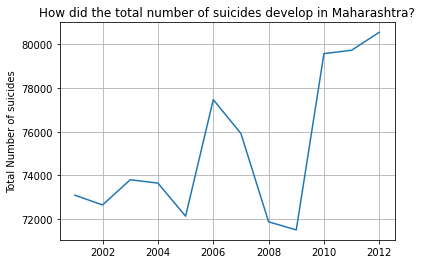

In [140]:
y_ans_val = [val.Sum for val in df_Maharashtra.select('Sum').collect()]
x_ts = [val.Year for val in df_Maharashtra.select('Year').collect()]

plt.plot(x_ts, y_ans_val)
plt.ylabel('Total Number of suicides')
plt.title('How did the total number of suicides develop in Maharashtra?')
plt.grid(True)

plt.show()

Here one can see that the number of people committing suicide has also increased in the state with the highest rate. However, the increase is not particularly strong and the number of people committing suicide is at a constant high level.

#### 6.6 How did the number for each of the causes develop over the year?

In [141]:
df_causes_dev = df.where((col("Type_code")=="Causes"))\
                  .groupBy("Year", "Type")\
                  .agg(sum("Total")\
                       .alias("Total"))\
                  .orderBy("Year")

df_causes_dev.show()

+----+--------------------+-----+
|Year|                Type|Total|
+----+--------------------+-----+
|2001|Other Causes (Ple...|13854|
|2001|     Family Problems|24162|
|2001|Cancellation/Non-...|  924|
|2001|Physical Abuse (R...|  376|
|2001|Bankruptcy or Sud...| 2918|
|2001|Suspected/Illicit...| 1200|
|2001|Death of Dear Person|  871|
|2001|             Divorce|  316|
|2001|  Illness (Aids/STD)|  741|
|2001|    Property Dispute| 1599|
|2001|Insanity/Mental I...| 5858|
|2001|Fall in Social Re...| 1209|
|2001|        Love Affairs| 3114|
|2001|Illegitimate Preg...|  369|
|2001|             Poverty| 2549|
|2001|Professional/Care...|  857|
|2001|Ideological Cause...|  104|
|2001|           Paralysis|  772|
|2001|Drug Abuse/Addiction| 1414|
|2001|       Dowry Dispute| 2414|
+----+--------------------+-----+
only showing top 20 rows



Since there are quite many causes, I decided to focus on the two main causes: family problems and insantiy/mental illness:

In [142]:
df.where((col("Type_code")=="Causes") & ((col("Type")=="Family Problems") | (col("Type")=="Other Prolonged Illness")))\
    .groupBy("Year", "Type")\
    .agg(sum("Total")\
        .alias("Total"))\
    .orderBy("Year")\
    .show(40)

+----+--------------------+-----+
|Year|                Type|Total|
+----+--------------------+-----+
|2001|     Family Problems|24162|
|2001|Other Prolonged I...|15947|
|2002|Other Prolonged I...|17296|
|2002|     Family Problems|25085|
|2003|Other Prolonged I...|15636|
|2003|     Family Problems|26308|
|2004|Other Prolonged I...|16341|
|2004|     Family Problems|25531|
|2005|Other Prolonged I...|14820|
|2005|     Family Problems|25441|
|2006|     Family Problems|30771|
|2006|Other Prolonged I...|16497|
|2007|     Family Problems|29238|
|2007|Other Prolonged I...|16452|
|2008|Other Prolonged I...|16651|
|2008|     Family Problems|29777|
|2009|     Family Problems|30082|
|2009|Other Prolonged I...|16028|
|2010|     Family Problems|31856|
|2010|Other Prolonged I...|17044|
|2011|Other Prolonged I...|16154|
|2011|     Family Problems|32909|
|2012|Other Prolonged I...|15699|
|2012|     Family Problems|30792|
+----+--------------------+-----+



Split the table up in two so it is easier to do the calculations:

**Family problems:**

In [144]:
df_family_problems = df.where((col("Type_code")=="Causes") & (col("Type")=="Family Problems"))\
                       .groupBy("Year")\
                       .agg(sum("Total")\
                            .alias("Total"))\
                       .orderBy("Year")
df_family_problems.show()

+----+-----+
|Year|Total|
+----+-----+
|2001|24162|
|2002|25085|
|2003|26308|
|2004|25531|
|2005|25441|
|2006|30771|
|2007|29238|
|2008|29777|
|2009|30082|
|2010|31856|
|2011|32909|
|2012|30792|
+----+-----+



In [145]:
number_window = Window.partitionBy().orderBy("Year")

In [153]:
df_family_problems = df_family_problems.withColumn("Previous", F.lag(df_family_problems.Total).over(number_window))
df_family_problems = df_family_problems.withColumn("diff", F.when(F.isnull(df_family_problems.Total - df_family_problems.Previous), 0)\
                                                   .otherwise(df_family_problems.Total - df_family_problems.Previous))
df_family_problems.withColumn("perc_change_family_problems",  sqlround((F.col("diff") / F.col("Previous"))*100)).show()


+----+-----+--------+-----+---------------------------+
|Year|Total|Previous| diff|perc_change_family_problems|
+----+-----+--------+-----+---------------------------+
|2001|24162|    null|    0|                       null|
|2002|25085|   24162|  923|                        4.0|
|2003|26308|   25085| 1223|                        5.0|
|2004|25531|   26308| -777|                       -3.0|
|2005|25441|   25531|  -90|                        0.0|
|2006|30771|   25441| 5330|                       21.0|
|2007|29238|   30771|-1533|                       -5.0|
|2008|29777|   29238|  539|                        2.0|
|2009|30082|   29777|  305|                        1.0|
|2010|31856|   30082| 1774|                        6.0|
|2011|32909|   31856| 1053|                        3.0|
|2012|30792|   32909|-2117|                       -6.0|
+----+-----+--------+-----+---------------------------+



**Illness problems:**

In [147]:
df_illness_problems = df.where((col("Type_code")=="Causes") & (col("Type")=="Other Prolonged Illness"))\
                       .groupBy("Year")\
                       .agg(sum("Total")\
                            .alias("Total"))\
                       .orderBy("Year")
df_illness_problems.show()

+----+-----+
|Year|Total|
+----+-----+
|2001|15947|
|2002|17296|
|2003|15636|
|2004|16341|
|2005|14820|
|2006|16497|
|2007|16452|
|2008|16651|
|2009|16028|
|2010|17044|
|2011|16154|
|2012|15699|
+----+-----+



In [157]:
df_illness_problems = df_illness_problems.withColumn("Previous", F.lag(df_illness_problems.Total).over(number_window))
df_illness_problems = df_illness_problems.withColumn("diff", F.when(F.isnull(df_illness_problems.Total - df_illness_problems.Previous), 0)\
                                                   .otherwise(df_illness_problems.Total - df_illness_problems.Previous))
df_illness_problems.withColumn("perc_change_illness",  sqlround((F.col("diff") / F.col("Previous"))*100)).show()

+----+-----+--------+-----+-------------------+
|Year|Total|Previous| diff|perc_change_illness|
+----+-----+--------+-----+-------------------+
|2001|15947|    null|    0|               null|
|2002|17296|   15947| 1349|                8.0|
|2003|15636|   17296|-1660|              -10.0|
|2004|16341|   15636|  705|                5.0|
|2005|14820|   16341|-1521|               -9.0|
|2006|16497|   14820| 1677|               11.0|
|2007|16452|   16497|  -45|                0.0|
|2008|16651|   16452|  199|                1.0|
|2009|16028|   16651| -623|               -4.0|
|2010|17044|   16028| 1016|                6.0|
|2011|16154|   17044| -890|               -5.0|
|2012|15699|   16154| -455|               -3.0|
+----+-----+--------+-----+-------------------+



Unfortunately, this analysis does not show a clear trend for the two causes of illness and family problems. In some years both show a negative growth in some years a positive growth. Nevertheless, one can see that the percentage growth for suicide due to illness is rather negative. 

Let's have a closer look at the percentage changes metrics to get a better feeling of the overall change in the time span of 11 years:

For **Family problems**:

In [149]:
df_family_aggs = df_family_problems.withColumn("perc_change",  sqlround((F.col("diff") / F.col("Previous"))*100))

In [155]:
df_family_aggs.agg(min("perc_change").alias("min_perc_change"),\
                    max("perc_change").alias("max_perc_change"),\
                    sqlround(avg("perc_change")).alias("avg_perc_change_family"))\
               .show()

+---------------+---------------+----------------------+
|min_perc_change|max_perc_change|avg_perc_change_family|
+---------------+---------------+----------------------+
|           -6.0|           21.0|                   3.0|
+---------------+---------------+----------------------+



For **Illness**:

In [151]:
df_illness_aggs = df_illness_problems.withColumn("perc_change",  sqlround((F.col("diff") / F.col("Previous"))*100))

In [156]:
df_illness_aggs.agg(min("perc_change").alias("min_perc_change"),\
                    max("perc_change").alias("max_perc_change"),\
                    sqlround(avg("perc_change")).alias("avg_perc_change_illness"))\
               .show()

+---------------+---------------+-----------------------+
|min_perc_change|max_perc_change|avg_perc_change_illness|
+---------------+---------------+-----------------------+
|          -10.0|           11.0|                    0.0|
+---------------+---------------+-----------------------+



Finally, after checking the metrics for overall percentage change looking at both causes categories, there is clearly a difference. 
For Family problems we can see an average increase of 3% while for Illness the average is only at 0%.